In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
data_train = pd.read_csv('/mnt/md0/copd_data/training_data.csv')

In [4]:
data_train.head()

,patid,DOB,Date_35,indexdate,deathdate,deathdate_resp,exitdate,age_at_entry,age_at_death,bmi_gprd,...,mrc_breath_scale_gprd,imd_5,cod,ethnicity,gold_stage,BMI,age_group,atopy_multi,AsthmaEver,group
0,2084,1933-06-01,1968-06-01,2014-09-30,NaN,NaN,2015-12-21,81.38630,NaN,18.8,...,3,5,NaN,White,2,2,5,0.0,0,train
1,3178,1946-06-01,1981-06-01,2011-06-24,NaN,NaN,2015-12-09,65.10685,NaN,27.0,...,3,2,NaN,White,1,3,4,0.0,1,train
2,4459,1942-06-01,1977-06-01,2007-06-14,2012-04-30,NaN,2012-04-30,65.07945,70.0,32.7,...,2,4,Other,White,3,4,4,0.0,0,train
3,5099,1943-06-01,1978-06-01,2013-05-20,2016-11-09,NaN,2014-06-21,70.01644,73.0,23.2,...,2,3,Neoplasms,White,3,2,4,0.0,0,train
4,6385,1937-06-01,1972-06-01,2002-11-05,NaN,NaN,2009-09-04,65.47397,NaN,35.8,...,0,4,NaN,White,2,4,4,0.0,1,train


In [5]:
raw_features = ['age_group','BMI', 'gold_stage', 'gender', 'smoke_gprd', 'anxiety_gprd', 'depression_gprd',
            'eosinophils_high', 'atopy_multi', 'CRS_gprd' , 'diabdiag_cprd',
                'ht_cprd', 'hf_gprd','ischaemic_heart_disease_gprd','gerd_gprd', 'therapy']

In [6]:
data_train[raw_features].head()

,age_group,BMI,gold_stage,gender,smoke_gprd,anxiety_gprd,depression_gprd,eosinophils_high,atopy_multi,CRS_gprd,diabdiag_cprd,ht_cprd,hf_gprd,ischaemic_heart_disease_gprd,gerd_gprd,therapy
0,5,2,2,0,1,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
1,4,3,1,0,1,0.0,0.0,1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2
2,4,4,3,0,1,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4,2,3,0,0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,4,4,2,1,0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [7]:
data_train[raw_features].shape

(23275, 16)

In [8]:
for column in raw_features:
    data_train[column] = data_train[column].astype('O')
X_features = pd.get_dummies(data_train[raw_features], dummy_na=False)

In [9]:
X_features.shape

(23275, 41)

In [10]:
X_features.head()

,age_group_1,age_group_2,age_group_3,age_group_4,age_group_5,BMI_1,BMI_2,BMI_3,BMI_4,gold_stage_1,...,hf_gprd_0.0,hf_gprd_1.0,ischaemic_heart_disease_gprd_0.0,ischaemic_heart_disease_gprd_1.0,gerd_gprd_0.0,gerd_gprd_1.0,therapy_0,therapy_1,therapy_2,therapy_3
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,1,1,0,1,0,0,0
1,0,0,0,1,0,0,0,1,0,1,...,0,1,1,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,0,0
3,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0
4,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,0,0


In [11]:
import tensorflow as tf
import numpy as np

In [12]:
# Training Parameters
learning_rate = 0.01
num_steps = 182
batch_size = 128

In [13]:
# Network Parameters
num_hidden_1 = 3 # 1st layer num features (embeddings)
num_input = 41 # data input

In [14]:
# tf Graph input
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b1': tf.Variable(tf.random_normal([num_input])),
}

In [15]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with relu activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    return layer_1

In [16]:
# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    return layer_1

In [17]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [18]:
# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

In [19]:
# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

In [20]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [21]:
# Function that returns next batch given step count

def next_batch(batch_size, i):
    start = batch_size*(i-1)
    end = batch_size*(i-1) + batch_size
    if end >= X_features.shape[0]:
        end = -1
    batch_x = X_features.iloc[start: end].values
    return batch_x

In [22]:
next_batch(2,1)

array([[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0]],
      dtype=uint8)

In [23]:
X_features.iloc[0: 2]

,age_group_1,age_group_2,age_group_3,age_group_4,age_group_5,BMI_1,BMI_2,BMI_3,BMI_4,gold_stage_1,...,hf_gprd_0.0,hf_gprd_1.0,ischaemic_heart_disease_gprd_0.0,ischaemic_heart_disease_gprd_1.0,gerd_gprd_0.0,gerd_gprd_1.0,therapy_0,therapy_1,therapy_2,therapy_3
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,1,1,0,1,0,0,0
1,0,0,0,1,0,0,0,1,0,1,...,0,1,1,0,0,1,0,0,1,0


In [24]:
# Start Training
# Start a new TF session

# Don't try to find GPUs:

config = tf.ConfigProto(
        device_count = {'GPU': 0}
    )

display_step = 20

with tf.Session(config=config) as sess:

    # Run the initializer
    sess.run(init)

    # Training
    for i in range(1, num_steps+1):
        # Prepare Data
        # Get the next batch of data
        batch_x= next_batch(batch_size, i)

        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
        # Display logs per step
        if i % display_step == 0 or i == 1:
            print('Step %i: Minibatch Loss: %f' % (i, l))
    r = sess.run(encoder_op, feed_dict={X: X_features.values})
    g = sess.run(decoder_op, feed_dict={encoder_op: r})

Step 1: Minibatch Loss: 0.337025
Step 20: Minibatch Loss: 0.338415
Step 40: Minibatch Loss: 0.343820
Step 60: Minibatch Loss: 0.337397
Step 80: Minibatch Loss: 0.329786
Step 100: Minibatch Loss: 0.311176
Step 120: Minibatch Loss: 0.284012
Step 140: Minibatch Loss: 0.247630
Step 160: Minibatch Loss: 0.211787
Step 180: Minibatch Loss: 0.189936


In [25]:
r.shape

(23275, 3)

In [26]:
r[r!=0].shape

(69825,)

In [27]:
r

array([[5.3391069e-01, 7.0992642e-04, 9.9627280e-01],
       [2.9580119e-01, 1.5492712e-02, 9.6720046e-01],
       [4.8198353e-02, 1.1366526e-02, 9.9951351e-01],
       ...,
       [1.7284524e-01, 1.8114035e-01, 9.9997461e-01],
       [1.3715829e-02, 3.1131923e-01, 9.9955124e-01],
       [5.3397405e-01, 1.9120896e-03, 9.9871230e-01]], dtype=float32)

In [28]:
g.shape

(23275, 41)

In [29]:
g_round = g.round()

In [30]:
g_round[g_round > 0].shape

(359701,)

In [31]:
X_features.values[X_features.values > 0].shape

(372400,)

In [32]:
g_round

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
X_features.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 1]], dtype=uint8)

In [34]:
np.sum((g.astype(int) - X_features.values)**2)

372400

In [35]:
import matplotlib
import matplotlib.pyplot as plt

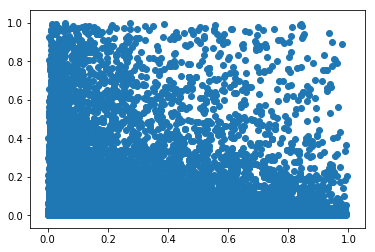

In [36]:
plt.scatter(r[:,0], r[:,1])

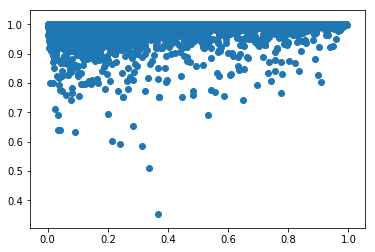

In [37]:
plt.scatter(r[:,0], r[:,2])